In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import scipy.optimize as opt
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

$$
\frac{1}{\xi^2}\frac{d}{d\xi}\left(\xi^2 \, \frac{d\psi}{d\xi}\right) = e^{-\psi} 
$$

$$
\begin{cases}
\displaystyle \frac{d\psi}{d\xi}=\omega \\[12pt]
\displaystyle \frac{d}{d\xi}\left(\xi^2 \omega\right)=\xi^2 \, e^{-\psi}
\end{cases}
$$

In [2]:
NOMI = np.array(["indice", "csi", "psi", "psi_p", "g_0", "f_0"])
#table = Table.read('build/Bonnor-Ebert_Eulero.dat', names = NOMI,  format="ascii")
table = Table.read('build/Bonnor-Ebert_RK.dat', names = NOMI,  format="ascii")
table

indice,csi,psi,psi_p,g_0,f_0
int64,float64,float64,float64,float64,float64
0,0.0001,0.0,0.0,0.9999,0.0
1,0.0002,3.51852e-09,5.74074e-05,0.9998,2.2963e-12
2,0.0003,1.12407e-08,9.58642e-05,0.9997,8.62778e-12
3,0.0004,2.25979e-08,0.000131005,0.9996,2.09608e-11
4,0.0005,3.74118e-08,0.000165176,0.9995,4.12941e-11
5,0.0006,5.5621e-08,0.000198965,0.9994,7.16274e-11
6,0.0007,7.7199e-08,0.000232573,0.9993,1.13961e-10
7,0.0008,1.02132e-07,0.000266084,0.9992,1.70294e-10
8,0.0009,1.30414e-07,0.00029954,0.9991,2.42627e-10


In [3]:
ORDINE = {nome: i for i,nome in enumerate(NOMI)}
data = np.array( [ table[nome] for nome in NOMI  ] ).T

In [4]:
indici = data[:, ORDINE["indice"] ]
csis = data[:, ORDINE["csi"] ]
psis = data[:, ORDINE["psi"] ]
psis_p = data[:, ORDINE["psi_p"] ]
g0s = data[:, ORDINE["g_0"] ]
f0s = data[:, ORDINE["f_0"] ]

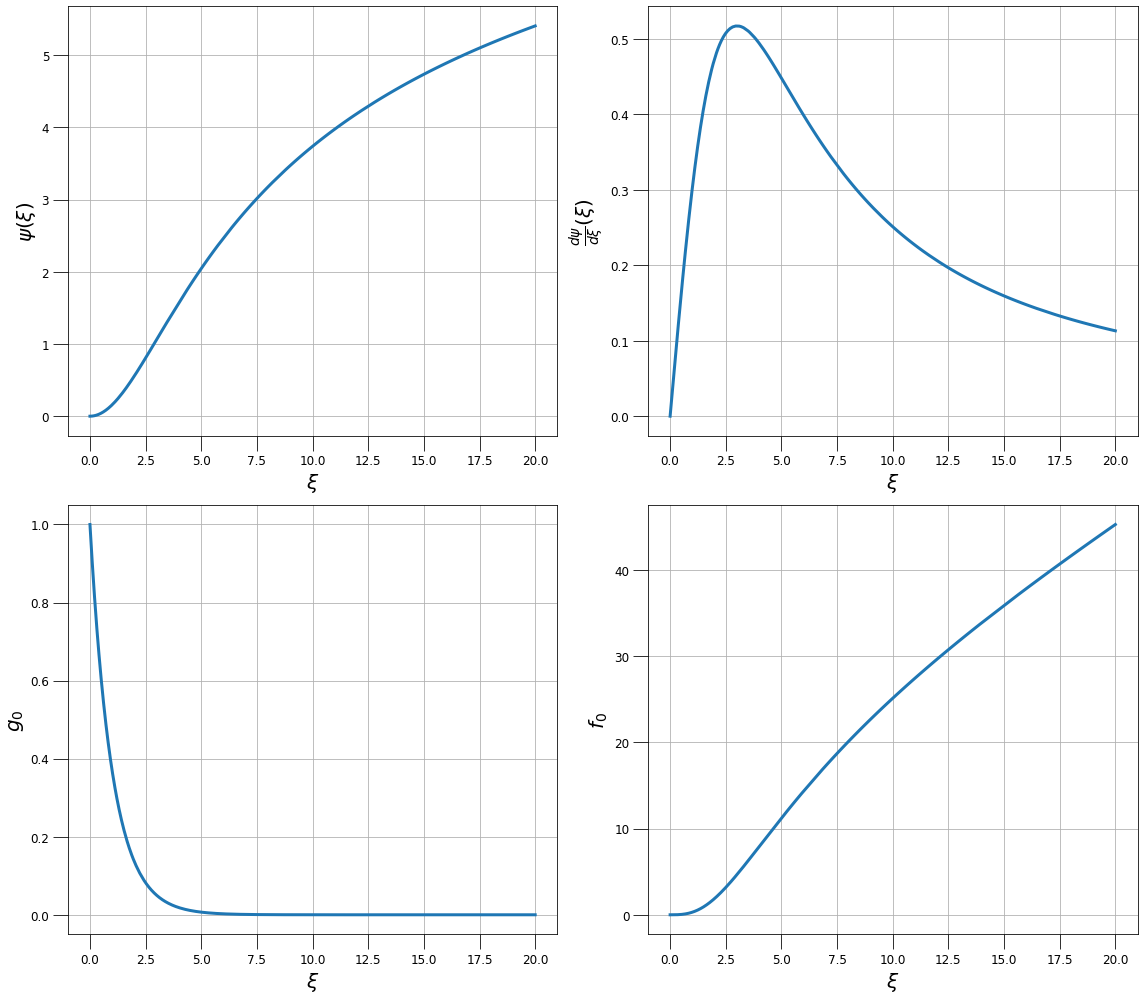

In [5]:
SIZE_ticks = 15
SIZE_labels = 20

fig, axs = plt.subplots(2, 2, figsize=(16, 14), tight_layout=True)
axs = axs.reshape(-1)

v_data = [psis, psis_p, g0s, f0s]
v_ynames = [r'$\psi(\xi)$', r'$\frac{d\psi}{d\xi}(\xi)$', r'$g_0$', r'$f_0$']

for i in range(len(v_data)):
    ax = axs[i]
    ax.plot(csis, v_data[i], '-', lw=3)
    ax.grid()
    #plt.xticks(np.arange(14,20,1), size=SIZE_2)
    #plt.yticks(np.arange(0,10,2), size=SIZE_2)
    ax.tick_params(axis='x', size=SIZE_ticks)
    ax.tick_params(axis='y', size=SIZE_ticks)
    ax.set_xlabel(r'$\xi$', size=SIZE_labels)
    ax.set_ylabel(v_ynames[i], size=SIZE_labels);

In [6]:
rho_norm = np.e**(-psis)

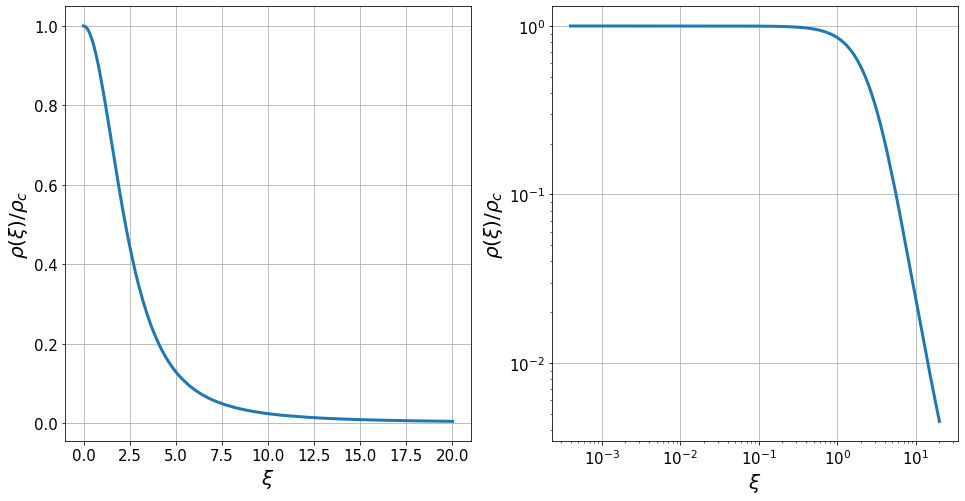

In [7]:
SIZE_ticks = 15
SIZE_labels = 20
Rows, Cols = 1, 2

fig = plt.figure(figsize = (16, 8))

plt.subplot(Rows, Cols, 1)
fig.subplots_adjust(wspace = 0.5, hspace = 0.2)
plt.plot(csis, rho_norm, '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels);



plt.subplot(Rows, Cols, 2)
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)
firsts_N = 3
plt.plot(csis[firsts_N:], rho_norm[firsts_N:], '-', lw=3)
plt.grid()
#plt.xticks(np.arange(14,20,1))
#plt.yticks(np.arange(0,10,2))
plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\rho(\xi)/\rho_c$', size=SIZE_labels)
plt.xscale("log")
plt.yscale("log")

In [32]:
pressures_0 = np.array([f**2.0*g/4/np.pi for f,g in zip(f0s, g0s)])
volumes_0 = np.array([(csi/f)**3.0 for csi,f in zip(csis, f0s)])
pressures_0, volumes_0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


(array([0.00000000e+00, 4.19527583e-25, 5.92185751e-24, ...,
        3.35920808e-07, 3.35889559e-07, 3.35858309e-07]),
 array([           inf, 6.60699700e+23, 4.20403746e+22, ...,
        8.63383872e-02, 8.63385375e-02, 8.63386878e-02]))

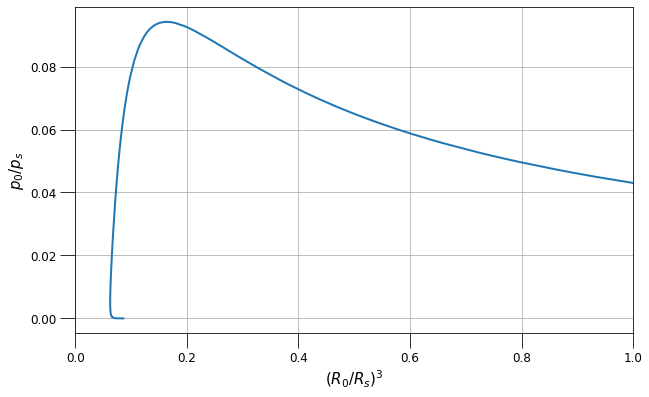

In [33]:
SIZE_ticks = 15
SIZE_labels = 15

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(volumes_0, pressures_0, '-', lw=2)
ax.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
ax.tick_params(axis='x', size=SIZE_ticks)
ax.tick_params(axis='y', size=SIZE_ticks)
ax.set_xlabel(r'$(R_0/R_s)^3$', size=SIZE_labels)
ax.set_ylabel(r'$p_0/p_s$', size=SIZE_labels)
ax.set_xlim(0., 1);
#ax.set_ylim(0., 1)
#plt.xscale("log")
#plt.yscale("log");

In [31]:
max(pressures_0), np.argmax(pressures_0), pressures_0[np.argmax(pressures_0)]

(1.183699226434729, 35965, 1.183699226434729)

In [11]:
volumes_0[np.argmax(pressures_0)], volumes_0[np.argmax(pressures_0)]**0.333333

(0.16399836566917106, 0.5473688790755156)

In [12]:
np.where(volumes_0>10)[0][-1]

12725

In [13]:
ind_end = np.where(abs(volumes_0-0.6) < 0.01)[0][1]
ind_beg = np.where(volumes_0>10)[0][-1]

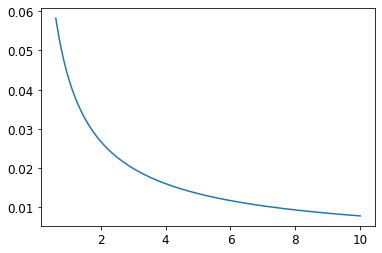

In [14]:
plt.plot(volumes_0[ind_beg:ind_end], pressures_0[ind_beg:ind_end])

In [15]:
initial_value = 0.6
ending_value = 10
def func(x, a, b, c, d, e, f):
    #return a + d/x**3.0
    return a + b/x + c/x**2.0 + d/x**3.0+ e/x**4.0

In [16]:
ind_end = np.where(abs(volumes_0-initial_value) < 0.01)[0][1]
ind_beg = np.where(volumes_0>ending_value)[0][-1]
xdata = volumes_0[ind_beg:ind_end]
ydata = pressures_0[ind_beg:ind_end]
popt, pcov = opt.curve_fit(func, xdata, ydata)
popt

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([ 0.00173144,  0.06557703, -0.03945935,  0.01926957, -0.00415111,
        1.        ])

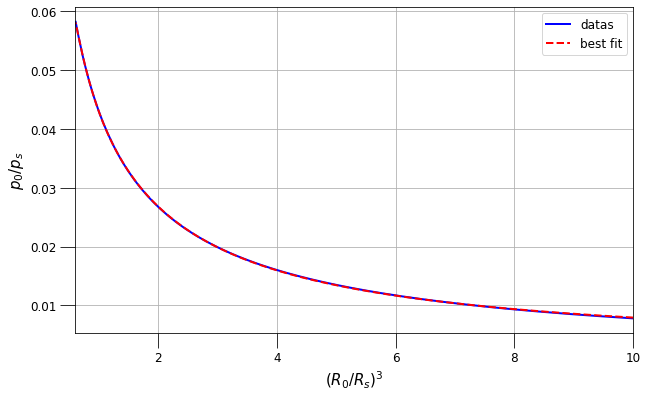

In [17]:
SIZE_ticks = 15
SIZE_labels = 15

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(xdata, ydata, 'b-', lw=2, label="datas")
ax.plot(xdata, func(xdata, *popt), 'r--', lw=2, label="best fit")
ax.grid()
#plt.xticks(np.arange(14,20,1), size=SIZE_2)
#plt.yticks(np.arange(0,10,2), size=SIZE_2)
ax.tick_params(axis='x', size=SIZE_ticks)
ax.tick_params(axis='y', size=SIZE_ticks)
ax.set_xlabel(r'$(R_0/R_s)^3$', size=SIZE_labels)
ax.set_ylabel(r'$p_0/p_s$', size=SIZE_labels)
ax.set_xlim(initial_value, ending_value);
ax.legend();
#ax.set_ylim(0., 1)
#plt.xscale("log")
#plt.yscale("log");